In [1]:
from pandas import Series
from pandas import DataFrame
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# read in the data
df = pd.read_csv("GermanCredit.csv") 
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

<div style=style="font-size: 12px">
   
     Processing

</div>

drop the 3 lowest contributing columns

In [3]:
# dict to store the amount of nones in each col
lowestContribute = {}
# get the count of all none values in each col
for name,data in df.items():
    lowestContribute[name] = (df[name]=="none").sum()

# sort the dict so that highest amount of none will be first
lowestContribute = sorted(lowestContribute.items(), key=lambda kv: kv[1], reverse=True)
print(lowestContribute)

# functions to drop n useless columns
def dropNcontribute(n):
    for i in range(n):
        # lowestContribute is a tuple, so we must access the key from [i][0]
        del df[lowestContribute[i][0]]
        # print(lowestContribute[i][0])

# drop the 3 lowest
dropNcontribute(3)
df.info()


[('other_parties', 907), ('other_payment_plans', 814), ('own_telephone', 596), ('checking_status', 0), ('duration', 0), ('credit_history', 0), ('purpose', 0), ('credit_amount', 0), ('savings_status', 0), ('employment', 0), ('installment_commitment', 0), ('personal_status', 0), ('residence_since', 0), ('property_magnitude', 0), ('age', 0), ('housing', 0), ('existing_credits', 0), ('job', 0), ('num_dependents', 0), ('foreign_worker', 0), ('class', 0)]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment         

Remove all apostrophy that's in element

In [4]:
df = df.replace({"'":""},regex=True)       
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


Edit the checking_status columns

In [5]:
df["checking_status"].value_counts()

no checking    394
<0             274
0<=X<200       269
>=200           63
Name: checking_status, dtype: int64

In [6]:
df["checking_status"] = df["checking_status"].apply(lambda x: "No Checking" if "no checking" == x else x)
df["checking_status"] = df["checking_status"].apply(lambda x: "Low" if "<0" == x else x)
df["checking_status"] = df["checking_status"].apply(lambda x: "Medium" if "0<=X<200" == x else x)
df["checking_status"] = df["checking_status"].apply(lambda x: "High" if ">=200" == x else x)

In [7]:
df["checking_status"].value_counts()

No Checking    394
Low            274
Medium         269
High            63
Name: checking_status, dtype: int64

Editing savings_status col

In [8]:
df["savings_status"].value_counts()

<100                603
no known savings    183
100<=X<500          103
500<=X<1000          63
>=1000               48
Name: savings_status, dtype: int64

In [9]:
df["savings_status"] = df["savings_status"].apply(lambda x: "No Savings" if "no known savings" == x else x)
df["savings_status"] = df["savings_status"].apply(lambda x: "Low" if "<100" == x else x)
df["savings_status"] = df["savings_status"].apply(lambda x: "Medium" if "100<=X<500" == x else x)
df["savings_status"] = df["savings_status"].apply(lambda x: "High" if "500<=X<1000" == x or ">=1000" == x else x)

In [10]:
df["savings_status"].value_counts()

Low           603
No Savings    183
High          111
Medium        103
Name: savings_status, dtype: int64

1) Editing class cols and 2) employment 

In [11]:
df["class"].value_counts()

good    700
bad     300
Name: class, dtype: int64

In [12]:
df["class"] = df["class"].apply(lambda x: "1" if "good" == x else "2")

In [13]:
df["class"].value_counts()

1    700
2    300
Name: class, dtype: int64

In [14]:
df["employment"].value_counts()

1<=X<4        339
>=7           253
4<=X<7        174
<1            172
unemployed     62
Name: employment, dtype: int64

In [16]:
df["employment"] = df["employment"].apply(lambda x: "Umemployed" if "unemployed" == x else x)
df["employment"] = df["employment"].apply(lambda x: "Amateur" if "<1" == x else x)
df["employment"] = df["employment"].apply(lambda x: "Professional" if "1<=X<4" == x else x)
df["employment"] = df["employment"].apply(lambda x: "Experienced" if "4<=X<7" == x else x)
df["employment"] = df["employment"].apply(lambda x: "Expert" if ">=7" == x else x)


In [17]:
df["employment"].value_counts()

Professional    339
Expert          253
Experienced     174
Amateur         172
Umemployed       62
Name: employment, dtype: int64

Processing Part Done.

Analysis:

CrossTab Section

In [19]:
# 1 is good
# 2 is bad
# since we changed the names earlier
pd.crosstab(df['foreign_worker'], df['class'])

class,1,2
foreign_worker,,
no,33,4
yes,667,296


In [20]:

pd.crosstab(df['employment'], df['savings_status'])

savings_status,High,Low,Medium,No Savings
employment,,,,
Amateur,12,120,17,23
Experienced,18,100,24,32
Expert,34,133,22,64
Professional,44,210,33,52
Umemployed,3,40,7,12


Average credit_amount for single males that have 4 ≤x<7 years of employment.

In [21]:
df["personal_status"].value_counts()
# under employment col, 4<=X<7 is Experienced
creditCount = 0
tempSumForCreditCount = 0
average_credit_amount = 0

for ind in df.index:
    personal = df['personal_status'][ind]
    employ =  df['employment'][ind]
    cc = df["credit_amount"][ind]
    if(personal == "male single" and employ == "Experienced"):
        tempSumForCreditCount = tempSumForCreditCount + cc
        creditCount += 1
        
average_credit_amount = tempSumForCreditCount / creditCount
print(average_credit_amount)

# print(df.iloc[2])

4142.592592592592


Average creadit_duration for each of the job types

In [22]:
jobTypesToCredit = {}
jobTypesToCreditCount = {}
df["job"].value_counts()
for ind in df.index:
    tempJob = df['job'][ind]
    duration =  df['duration'][ind]
    if jobTypesToCredit.get(tempJob) == None:
        jobTypesToCredit[tempJob] = duration
        jobTypesToCreditCount[tempJob] = 1
    else:
        jobTypesToCredit[tempJob] += duration
        jobTypesToCreditCount[tempJob] += 1
    # print(tempJob, duration)
    
# print(jobTypesToCreditCount)
# print(jobTypesToCredit)
jobToCreditCountAnswer = {}
for key, val in jobTypesToCreditCount.items():
    jobToCreditCountAnswer[key] = jobTypesToCredit[key] / jobTypesToCreditCount[key]
print(jobToCreditCountAnswer)
    

{'skilled': 21.41111111111111, 'unskilled resident': 16.535, 'high qualif/self emp/mgmt': 25.16891891891892, 'unemp/unskilled non res': 17.363636363636363}


Most common checking_status and savings_status for purpose of education:

In [23]:
purposeEducation = df[df["purpose"] == "education"]
df["purpose"].value_counts()
# for ind in df.index:
#     purpose = df['purpose'][ind]
c = purposeEducation["checking_status"].value_counts()
# print(c)
checkingCommon = c.index[0]

s = purposeEducation["savings_status"].value_counts()
# print(s)
savingsCommon = s.index[0]
# index 0 means the most common one
print(f'Most common checking status: {checkingCommon}')
print(f'Most common savings status: {savingsCommon}')

Most common checking status: No Checking
Most common savings status: Low


Analysis Done.

Visualization Part

Plot subplots of two histograms: one with savings_status
on the x-axis and personal_status as different colors, and another
with checking_status on the x-axis and personal_status as differ-
ent colors.

Text(0, 0.5, 'peronsal status')

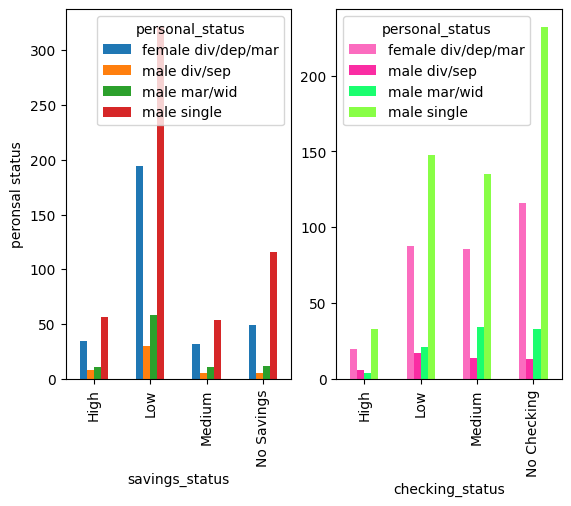

In [24]:
# get info from cross tab and save it
ss = pd.crosstab(df['savings_status'], df['personal_status'])
# pd.crosstab(df["checking_status"],df['personal_status'])
# ss.plot(kind="bar")

cs = pd.crosstab(df["checking_status"],df["personal_status"])
# cs.plot(kind="bar")
fig, axes = plt.subplots(1,2)
ss.plot(kind="bar", ax = axes[0])
cs.plot(kind="bar", ax = axes[1],color = ['#fb6cbf','#fa2da3','#1afe6f','#88fe46'])
axes[0].set_ylabel("peronsal status")


For people having credit_amount more than 4000, plot a
bar graph which maps property_magnitude (x-axis) to the average
customer age for that magnitude (y-axis).

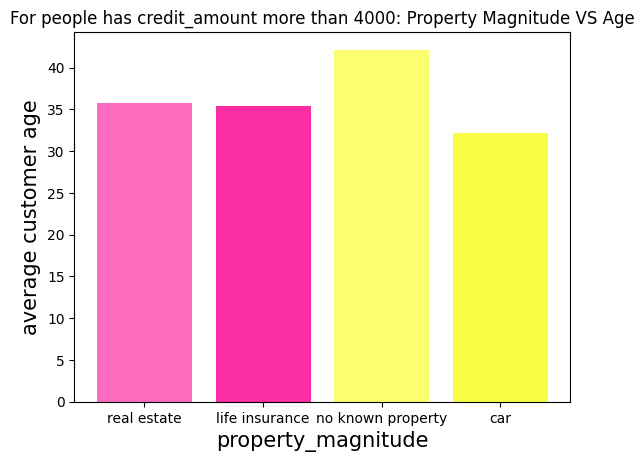

In [25]:
pmToAge = {}
pmToAgeCount = {}
pmToAgeAnswer = {}
for ind in df.index:
    ca = df['credit_amount'][ind]
    pm =  df['property_magnitude'][ind]
    age = df['age'][ind]
    if(ca > 4000):
        # print(pm)
        if(pmToAge.get(pm) == None):
            pmToAge[pm] = age
            pmToAgeCount[pm] = 1
        else:
            pmToAge[pm] += age
            pmToAgeCount[pm] += 1
# print(pmToAge)
# print(pmToAgeCount)
xList = []
yList= []
for key, val in pmToAge.items():
    pmToAgeAnswer[key] = pmToAge[key] / pmToAgeCount[key]
    xList.append(key)
    yList.append(pmToAge[key] / pmToAgeCount[key])
# print(pmToAgeAnswer)
# print(xList,yList)
plt.bar(xList,yList, color = ['#fb6cbf','#fa2da3','#fafe6f','#f8fe46'])
plt.title("For people has credit_amount more than 4000: Property Magnitude VS Age")
plt.xlabel("property_magnitude",fontsize=15)
plt.ylabel("average customer age",fontsize=15)
plt.show()

For people with a “High” savings_status and age above
40, use subplots to plot the following pie charts:

Text(0.5, 1.0, 'job')

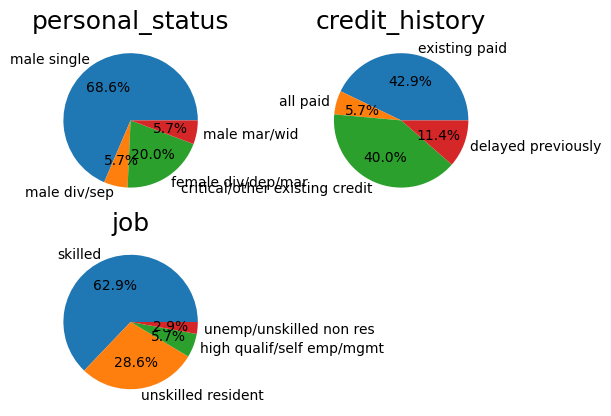

In [26]:
personal = {}
creditHistry = {}
jobs = {}
for ind in df.index:
    ss = df['savings_status'][ind]
    age =  df['age'][ind]
    p = df["personal_status"][ind]
    ch = df["credit_history"][ind]
    job = df["job"][ind]
    if(ss == "High" and age > 40):
        # print(ss, age)
        # for personal_status
        if(personal.get(p) == None):
            personal[p] = 1
        else:
            personal[p] += 1
        # for credit_history
        if(creditHistry.get(ch) == None):
            creditHistry[ch] = 1
        else:
            creditHistry[ch] += 1
        # for jobs
        if(jobs.get(job) == None):
            jobs[job] = 1
        else:
            jobs[job] += 1
        
# print(personal)        
# print(creditHistry)
# print(jobs)

fig, axes = plt.subplots(2,2)

# turn last graph off index at [1,1]
axes[1][1].set_axis_off()

# create personal_status list
personalvalue = []
personalLabel = []
for key, val in personal.items():
    personalvalue.append(val)
    personalLabel.append(key)

axes[0][0].pie(personalvalue, labels=personalLabel, autopct='%1.1f%%')
axes[0][0].set_title('personal_status',fontsize = 18)


# create credit_history list
creditHistryVal = []
creditHistryLabel = []
for key, val in creditHistry.items():
    creditHistryVal.append(val)
    creditHistryLabel.append(key)
axes[0][1].pie(creditHistryVal, labels=creditHistryLabel, autopct='%1.1f%%')
axes[0][1].set_title("credit_history",fontsize = 18)

# create jobs list
jobsVal = []
jobsLabel = []
for key, val in jobs.items():
    jobsVal.append(val)
    jobsLabel.append(key)
axes[1][0].pie(jobsVal, labels=jobsLabel, autopct='%1.1f%%')
axes[1][0].set_title("job",fontsize = 18)
